<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Model_RandomForest_Tunning_ConMatrix_ROC_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Checking Ram

In [28]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


#Mount Google drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#numpy and pandas

In [30]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/drive/MyDrive/Thesis_Data/EEG_HMC_Wake_NREM_REM_3000.csv')



dataset.head()
target="Sleep Stage"


In [31]:
dataset.shape

(3000, 76)

In [32]:
dataset.describe()

,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,PeakF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.000426,9.395700,16.318189,15.531499,8.461820,0.000539,15.935355,26.833337,30.644532,28.141726,...,0.009766,0.991989,6.134967,3.135855,0.750433,0.000136,38.360163,45.633352,49.122280,47.321954
std,0.000579,1.056203,2.421351,2.627901,2.003914,0.001321,3.313279,6.844106,9.345749,17.499984,...,0.048910,0.279742,1.191390,0.787203,0.232703,0.000522,9.051138,5.533491,1.971033,7.687078
min,0.000091,5.120000,11.239020,10.240000,2.872200,0.000094,8.991220,17.108290,16.234150,6.493660,...,0.000240,0.124880,1.623410,0.624390,0.124880,0.000009,15.984390,32.343410,37.713170,7.367800
25%,0.000180,8.866340,14.860490,13.736590,6.868290,0.000170,13.861460,22.727800,23.601950,12.362930,...,0.000560,0.874150,5.744390,2.747320,0.624390,0.000023,31.219510,40.085850,49.826340,49.951220
50%,0.000230,9.365850,15.984390,15.110240,8.117070,0.000260,15.484880,24.975610,27.847800,19.106340,...,0.000940,0.999020,6.243900,3.371710,0.749270,0.000028,38.774635,49.826340,49.951220,49.951220
75%,0.000510,9.865370,16.983410,16.234150,9.865370,0.000430,16.983410,29.346340,35.465370,49.951220,...,0.002352,1.123900,6.618540,3.621460,0.874150,0.000045,48.702440,49.826340,49.951220,49.951220
max,0.009070,15.235120,26.349270,27.598050,21.603900,0.023070,27.348290,49.826340,49.951220,50.076100,...,0.923220,2.247800,13.112200,6.243900,2.747320,0.009810,49.951220,49.951220,55.196100,50.076100


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sleep Stage             3000 non-null   object 
 1   MeanP_Alpha_F4          3000 non-null   float64
 2   MedianF_Alpha_F4        3000 non-null   float64
 3   MeanF_Alpha_F4          3000 non-null   float64
 4   Spectral Edge_Alpha_F4  3000 non-null   float64
 5   PeakF_Alpha_F4          3000 non-null   float64
 6   MeanP_Beta_F4           3000 non-null   float64
 7   MedianF_Beta_F4         3000 non-null   float64
 8   MeanF_Beta_F4           3000 non-null   float64
 9   Spectral Edge_Beta_F4   3000 non-null   float64
 10  PeakF_Beta_F4           3000 non-null   float64
 11  MeanP_Theta_F4          3000 non-null   float64
 12  MedianF_Theta_F4        3000 non-null   float64
 13  MeanF_Theta_F4          3000 non-null   float64
 14  Spectral Edge_Theta_F4  3000 non-null   

In [34]:
dataset[target].value_counts()

NREM    1798
Wake     629
REM      573
Name: Sleep Stage, dtype: int64

#Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder

classes = np.array(sorted(list(set(dataset[target]))))
print("Before encoding: ",classes)
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])
print("After encoding:",set(dataset[target]))

Before encoding:  ['NREM' 'REM' 'Wake']
After encoding: {0, 1, 2}


In [36]:
#from label encoder the actual values were changed
classes_dict={
    0: "NREM",
    1: "REM",
    2: "WAKE"
}

#Dataset spliting to X and y

In [37]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

list_of_feat = X.columns

#Dataset Scaling

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X =  scaler.transform(X)

#Dataset spliting for training and testing

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
y_train.value_counts()

0    1447
2     494
1     459
Name: Sleep Stage, dtype: int64

#Dataset Balancing

In [14]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train, y_train= smote.fit_resample(X_train, y_train)

#new_dataset=pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

In [41]:
y_train.value_counts()

0    1447
2     494
1     459
Name: Sleep Stage, dtype: int64

#Training

##With Default parameters

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(n_estimators=10)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[340   4   7]
 [  9 104   1]
 [ 18   0 117]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       351
           1       0.96      0.91      0.94       114
           2       0.94      0.87      0.90       135

    accuracy                           0.94       600
   macro avg       0.94      0.92      0.93       600
weighted avg       0.94      0.94      0.93       600

Accurecy:  0.935


In [ ]:
!pip install graphviz


In [56]:
estimator = rf_default.estimators_[5]

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

fn=list_of_feat
cn=["0","1","2"]


fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (100,20), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rf_default.estimators_[index],
                   feature_names = fn,
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,27), dpi=800)
tree.plot_tree(rf_default.estimators_[0],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

##Tunning <i>n_estimators</i>

 10%|█         | 3/30 [00:00<00:01, 20.88it/s]

1/30 round completed......................... Accurecy: 0.85
2/30 round completed......................... Accurecy: 0.845
3/30 round completed......................... Accurecy: 0.8983333333333333
4/30 round completed......................... Accurecy: 0.8933333333333333
5/30 round completed......................... Accurecy: 0.895


 20%|██        | 6/30 [00:00<00:02, 11.75it/s]

6/30 round completed......................... Accurecy: 0.9116666666666666
7/30 round completed......................... Accurecy: 0.9183333333333333


 27%|██▋       | 8/30 [00:00<00:02,  8.84it/s]

8/30 round completed......................... Accurecy: 0.9183333333333333
9/30 round completed......................... Accurecy: 0.9133333333333333


 33%|███▎      | 10/30 [00:01<00:02,  7.04it/s]

10/30 round completed......................... Accurecy: 0.9166666666666666


 37%|███▋      | 11/30 [00:01<00:03,  6.25it/s]

11/30 round completed......................... Accurecy: 0.9133333333333333


 40%|████      | 12/30 [00:01<00:03,  5.53it/s]

12/30 round completed......................... Accurecy: 0.92


 43%|████▎     | 13/30 [00:01<00:03,  4.94it/s]

13/30 round completed......................... Accurecy: 0.9233333333333333


 47%|████▋     | 14/30 [00:02<00:03,  4.43it/s]

14/30 round completed......................... Accurecy: 0.9216666666666666


 50%|█████     | 15/30 [00:02<00:03,  4.03it/s]

15/30 round completed......................... Accurecy: 0.92


 53%|█████▎    | 16/30 [00:02<00:03,  3.68it/s]

16/30 round completed......................... Accurecy: 0.9233333333333333


 57%|█████▋    | 17/30 [00:03<00:03,  3.38it/s]

17/30 round completed......................... Accurecy: 0.9216666666666666


 60%|██████    | 18/30 [00:03<00:03,  3.15it/s]

18/30 round completed......................... Accurecy: 0.9233333333333333


 63%|██████▎   | 19/30 [00:04<00:03,  2.95it/s]

19/30 round completed......................... Accurecy: 0.9216666666666666


 67%|██████▋   | 20/30 [00:04<00:03,  2.77it/s]

20/30 round completed......................... Accurecy: 0.9233333333333333


 70%|███████   | 21/30 [00:04<00:03,  2.62it/s]

21/30 round completed......................... Accurecy: 0.92


 73%|███████▎  | 22/30 [00:05<00:03,  2.48it/s]

22/30 round completed......................... Accurecy: 0.9233333333333333


 77%|███████▋  | 23/30 [00:05<00:02,  2.34it/s]

23/30 round completed......................... Accurecy: 0.92


 80%|████████  | 24/30 [00:06<00:02,  2.23it/s]

24/30 round completed......................... Accurecy: 0.9216666666666666


 83%|████████▎ | 25/30 [00:06<00:02,  2.14it/s]

25/30 round completed......................... Accurecy: 0.9166666666666666


 87%|████████▋ | 26/30 [00:07<00:01,  2.04it/s]

26/30 round completed......................... Accurecy: 0.92


 90%|█████████ | 27/30 [00:07<00:01,  1.95it/s]

27/30 round completed......................... Accurecy: 0.9216666666666666


 93%|█████████▎| 28/30 [00:08<00:01,  1.87it/s]

28/30 round completed......................... Accurecy: 0.9233333333333333


 97%|█████████▋| 29/30 [00:09<00:00,  1.80it/s]

29/30 round completed......................... Accurecy: 0.92


100%|██████████| 30/30 [00:09<00:00,  3.08it/s]

30/30 round completed......................... Accurecy: 0.9216666666666666
The best n_estimators:
13


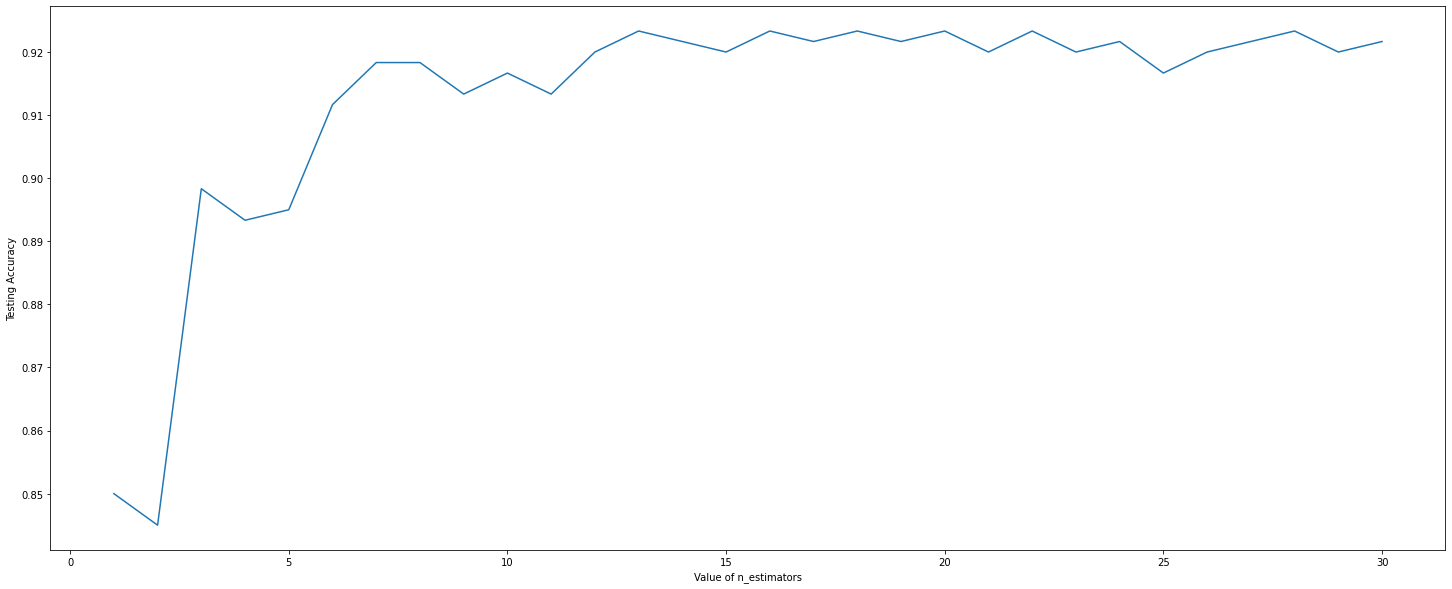

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

##Tunning <i>max_depth</i>

  3%|▎         | 1/30 [00:00<00:10,  2.67it/s]

1/30 round completed......................... Accurecy: 0.7516666666666667


  7%|▋         | 2/30 [00:00<00:14,  1.98it/s]

2/30 round completed......................... Accurecy: 0.76


 10%|█         | 3/30 [00:01<00:17,  1.59it/s]

3/30 round completed......................... Accurecy: 0.7833333333333333


 13%|█▎        | 4/30 [00:02<00:19,  1.31it/s]

4/30 round completed......................... Accurecy: 0.85


 17%|█▋        | 5/30 [00:03<00:22,  1.14it/s]

5/30 round completed......................... Accurecy: 0.8733333333333333


 20%|██        | 6/30 [00:05<00:24,  1.01s/it]

6/30 round completed......................... Accurecy: 0.8933333333333333


 23%|██▎       | 7/30 [00:06<00:26,  1.14s/it]

7/30 round completed......................... Accurecy: 0.915


 27%|██▋       | 8/30 [00:07<00:27,  1.26s/it]

8/30 round completed......................... Accurecy: 0.9233333333333333


 30%|███       | 9/30 [00:09<00:29,  1.38s/it]

9/30 round completed......................... Accurecy: 0.9316666666666666


 33%|███▎      | 10/30 [00:11<00:29,  1.49s/it]

10/30 round completed......................... Accurecy: 0.93


 37%|███▋      | 11/30 [00:13<00:30,  1.60s/it]

11/30 round completed......................... Accurecy: 0.93


 40%|████      | 12/30 [00:15<00:30,  1.70s/it]

12/30 round completed......................... Accurecy: 0.9266666666666666


 43%|████▎     | 13/30 [00:17<00:30,  1.77s/it]

13/30 round completed......................... Accurecy: 0.9316666666666666


 47%|████▋     | 14/30 [00:19<00:29,  1.82s/it]

14/30 round completed......................... Accurecy: 0.9383333333333334


 50%|█████     | 15/30 [00:21<00:28,  1.87s/it]

15/30 round completed......................... Accurecy: 0.935


 53%|█████▎    | 16/30 [00:23<00:26,  1.91s/it]

16/30 round completed......................... Accurecy: 0.9333333333333333


 57%|█████▋    | 17/30 [00:25<00:25,  1.94s/it]

17/30 round completed......................... Accurecy: 0.9316666666666666


 60%|██████    | 18/30 [00:27<00:23,  1.98s/it]

18/30 round completed......................... Accurecy: 0.9333333333333333


 63%|██████▎   | 19/30 [00:29<00:21,  1.99s/it]

19/30 round completed......................... Accurecy: 0.9266666666666666


 67%|██████▋   | 20/30 [00:31<00:19,  2.00s/it]

20/30 round completed......................... Accurecy: 0.9316666666666666


 70%|███████   | 21/30 [00:33<00:18,  2.00s/it]

21/30 round completed......................... Accurecy: 0.935


 73%|███████▎  | 22/30 [00:35<00:16,  2.01s/it]

22/30 round completed......................... Accurecy: 0.9333333333333333


 77%|███████▋  | 23/30 [00:37<00:14,  2.02s/it]

23/30 round completed......................... Accurecy: 0.9333333333333333


 80%|████████  | 24/30 [00:39<00:12,  2.03s/it]

24/30 round completed......................... Accurecy: 0.9333333333333333


 83%|████████▎ | 25/30 [00:41<00:10,  2.03s/it]

25/30 round completed......................... Accurecy: 0.9333333333333333


 87%|████████▋ | 26/30 [00:43<00:08,  2.03s/it]

26/30 round completed......................... Accurecy: 0.9333333333333333


 90%|█████████ | 27/30 [00:45<00:06,  2.03s/it]

27/30 round completed......................... Accurecy: 0.9333333333333333


 93%|█████████▎| 28/30 [00:47<00:04,  2.02s/it]

28/30 round completed......................... Accurecy: 0.9333333333333333


 97%|█████████▋| 29/30 [00:49<00:02,  2.03s/it]

29/30 round completed......................... Accurecy: 0.9333333333333333


100%|██████████| 30/30 [00:51<00:00,  1.72s/it]

30/30 round completed......................... Accurecy: 0.9333333333333333
The best Depth:
14


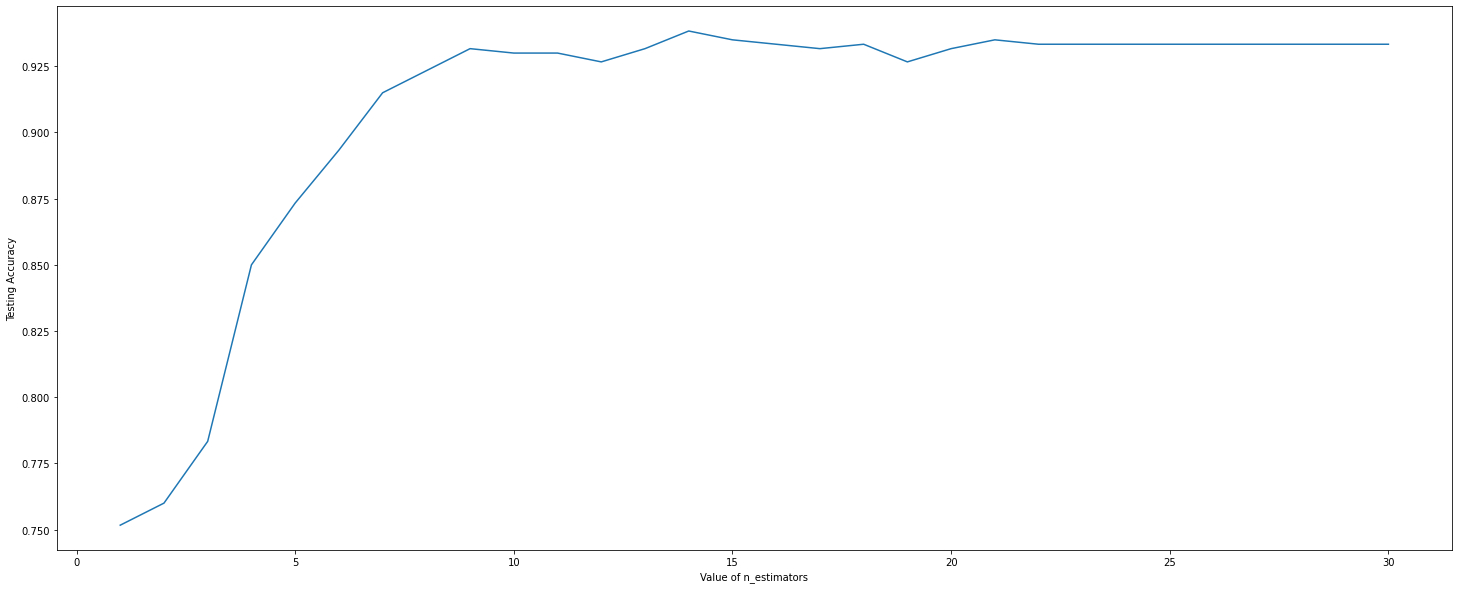

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)


##Result for best estimator

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[330  11  10]
 [  6 106   2]
 [ 16   1 118]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       351
           1       0.90      0.93      0.91       114
           2       0.91      0.87      0.89       135

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.92      0.92      0.92       600

Accurecy:  0.9233333333333333


##Result for best depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(max_depth=best_depth)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[330   9  12]
 [  6 107   1]
 [  8   2 125]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       351
           1       0.91      0.94      0.92       114
           2       0.91      0.93      0.92       135

    accuracy                           0.94       600
   macro avg       0.92      0.93      0.93       600
weighted avg       0.94      0.94      0.94       600

Accurecy:  0.9366666666666666


##Results for best estimator and best depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(max_depth=best_depth,n_estimators=best_estimator)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))


[[326  13  12]
 [  9 104   1]
 [ 12   1 122]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       351
           1       0.88      0.91      0.90       114
           2       0.90      0.90      0.90       135

    accuracy                           0.92       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.92      0.92      0.92       600

Accurecy:  0.92


#Set the model to be explained and visualization

<font color='coral'>Caution:</font> Please set the <i>trained_model</i> before proceeding

In [ ]:
trained_model = rf_all

#Visualization

##ROC CURVE

In [ ]:
!pip install kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 17.2 MB/s eta 0:00:00


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC_1(model,lebel_dict):

  y_scores = model.predict_proba(X_test)

  y_onehot = pd.get_dummies(y_test, columns=model.classes_)

  fig = go.Figure()
  fig.add_shape(
      type='line', line=dict(dash='dash'),
      x0=0, x1=1, y0=0, y1=1
  )

  for i in range(y_scores.shape[1]):
      y_true = y_onehot.iloc[:, i]
      y_score = y_scores[:, i]

      fpr, tpr, _ = roc_curve(y_true, y_score)
      auc_score = roc_auc_score(y_true, y_score)
      name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
      fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

  fig.update_layout(
      xaxis_title='False Positive Rate',
      yaxis_title='True Positive Rate',
      yaxis=dict(scaleanchor="x", scaleratio=1),
      xaxis=dict(constrain='domain'),
      width=1000, height=1000,
      font=dict(
        family="Courier New, monospace",
        size=20,
        color="BLack"
    ),
    legend=dict(
        x=0.67,
        y=0.05,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="White",
        borderwidth=2
    )
  )
  fig.show()



ploty_ROC_1(trained_model,classes_dict)

#Confusion Matrix

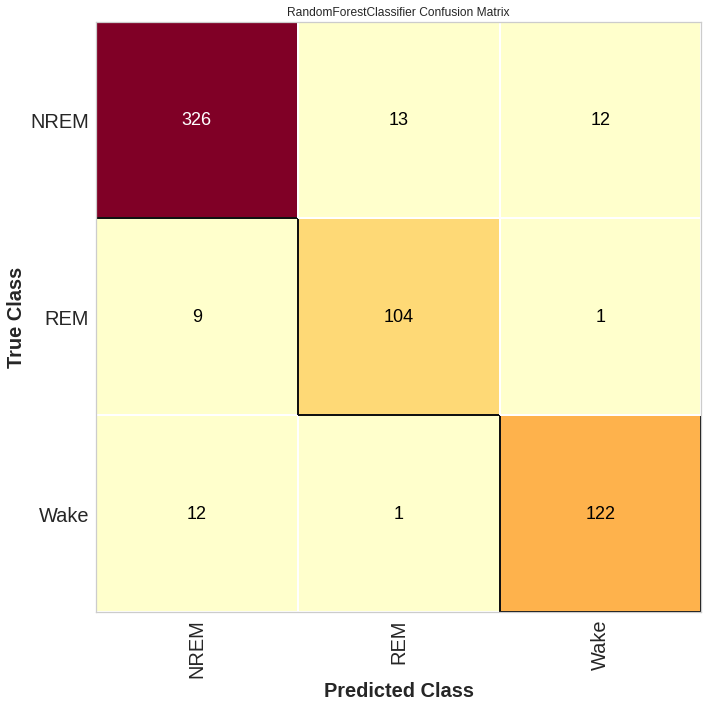

--------------------
--------------------


In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.dates as dates



def Conf_Mat(X_,y_,attb,model,cls):


  fig = plt.figure(figsize=(attb["Fig Height"],attb["Fig weidth"]))
  ax = fig.add_subplot(111)

  cm = ConfusionMatrix(model, classes=cls,fontsize=attb["Confusion Matrix Inner Fontsize"],ax=ax)
  cm.fit(X_train, y_train)
  cm.score(X_, y_)

  cm.ax.set_xlabel("Predicted Class", fontsize=attb["X Axis Fontsize"],fontweight="bold")
  cm.ax.set_ylabel("True Class", fontsize=attb["Y Axis Fontsize"],fontweight="bold")
  cm.ax.xaxis.set_tick_params(labelsize=attb["X Label Fontsize"])
  cm.ax.yaxis.set_tick_params(labelsize=attb["Y Label Fontsize"])
  for label in ax.get_xticklabels():
    label.set_fontweight(550)
  for label in ax.get_yticklabels():
    label.set_fontweight(550)

  plt.savefig("Testing_confusion_mat"+str(model)+".png")
  cm.show()
  print("--------------------")
  print("--------------------")


attributes={
   "Fig Height": 10,
   "Fig weidth": 10,

  "Y Axis Fontsize" : 20,
  "X Axis Fontsize" : 20,

  "Y Label Fontsize" : 20,
  "X Label Fontsize" : 20,

  "Confusion Matrix Inner Fontsize": 18


}


Conf_Mat(X_test,y_test,attributes,trained_model,classes)



#XAI

##SHAP (SHapley Additive exPlanations)

<font color='coral'> Docmumentation: </font> <a href = "https://shap.readthedocs.io/en/latest/#:~:text=SHAP%20(SHapley%20Additive%20exPlanations)%20is,papers%20for%20details%20and%20citations).">Click Here</a>

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.2 MB/s eta 0:00:00


###Local Explainer

In [ ]:
import shap
shap.initjs()

explainer_local = shap.TreeExplainer(trained_model)

start_index = 1      #set the starting index of the row to be explained
end_index = 10       #set the ending index of the row to be explained


shap_values = explainer_local.shap_values(X_test[start_index:end_index])

In [ ]:
shap.initjs()
# Force plot

shap.force_plot(explainer_local.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index],feature_names = list_of_feat) # for values

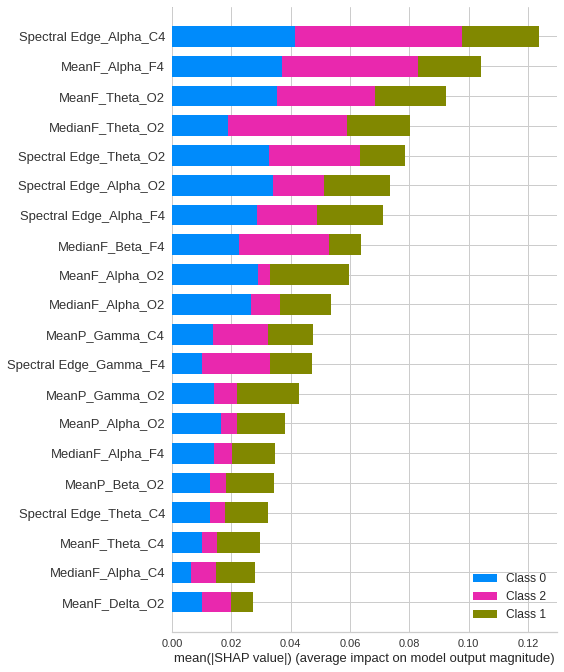

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=list_of_feat)

###Global Explainer

In [ ]:
def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

Models:  RandomForestClassifier(max_depth=14, n_estimators=13)


Permutation explainer: 601it [01:12,  7.50it/s]


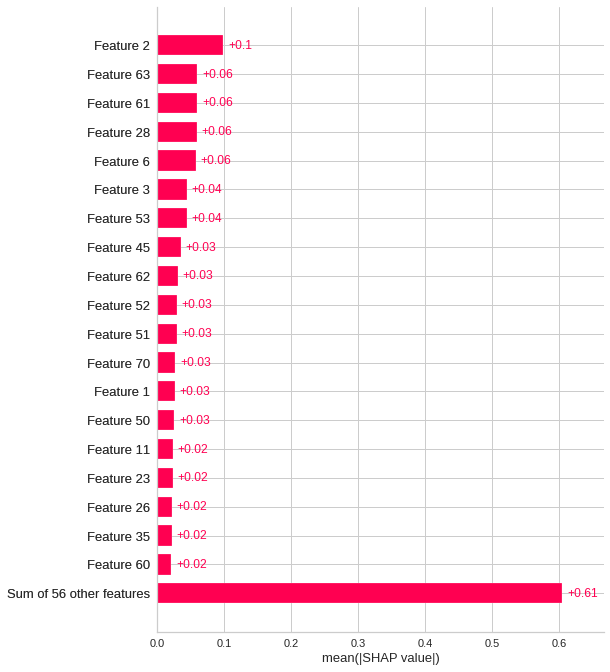

---------------------


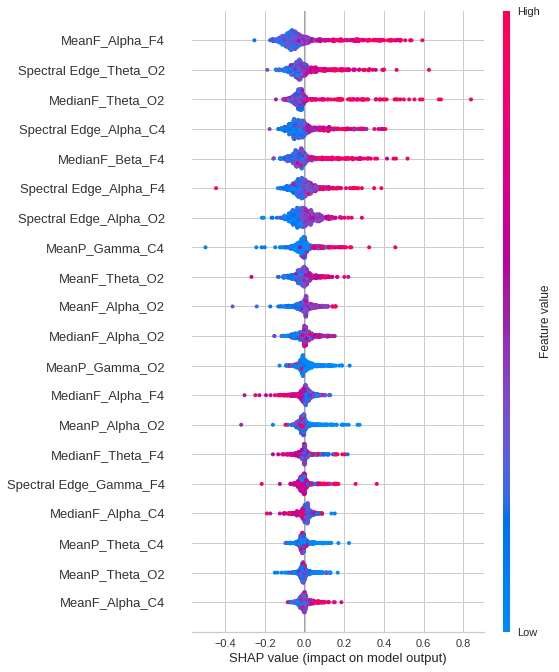

---------------------
Local Explaination


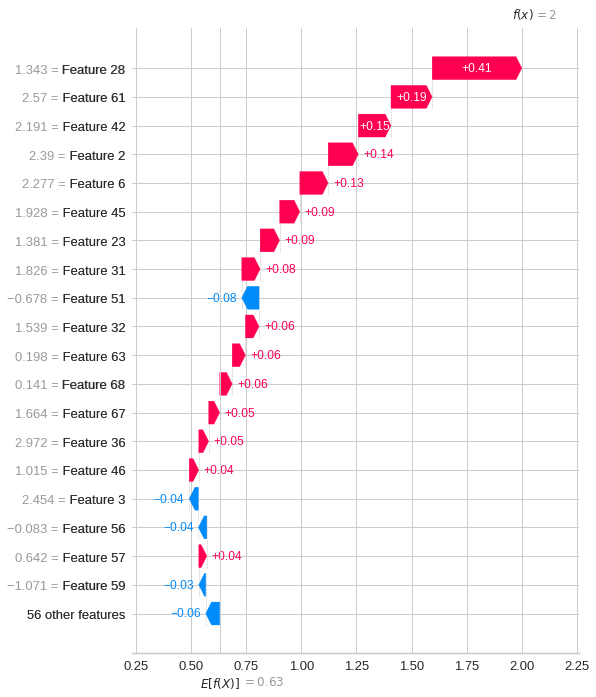

---------------------


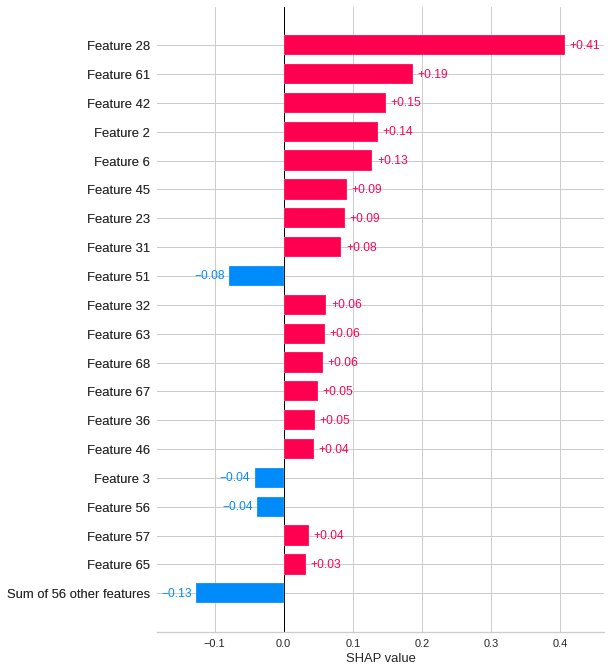

In [ ]:

graph_feat={
    "max_display":20,
    "shap_values Index":2
}


SHAP_EXP(trained_model,graph_feat)


##LIME
<font color='coral'> Docmumentation: </font> <a href = "https://pypi.org/project/lime/">Click Here</a>


In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=bb3fc195bf1687086fe2929669b22459e78dc1adcac483b8be12467a874c7bb3
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=list_of_feat,
    class_names=classes,
    mode='classification'
)

In [ ]:
explain_row = 10

In [ ]:
print("Actual value of test row: ", classes_dict[y_test[explain_row]])

Actual value of test row:  NREM


In [ ]:
exp = explainer.explain_instance(X_test[explain_row],                  #index of row, which will be explained
                                 trained_model.predict_proba,
                                 num_features=6,              # how many features will be explained
                                 top_labels=3)                # number of classes

exp.show_in_notebook(show_table=True, show_all=True)

In [ ]:
from IPython.display import HTML

html_data = exp.as_html()
HTML(data=html_data)

exp.save_to_file(str(trained_model)+"_explanation.html")
